### Analysis of Amenities and Review Scores

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns  
import pandas as pd
import numpy as np
import scipy.stats as stats
import chardet
import ast
import plotly.express as px
import plotly.graph_objects as go
import statsmodels.api as sm
from scipy.stats import ttest_ind
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.factorplots import interaction_plot
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Read in top 100 listing for each city
df_hk_top100 = pd.read_csv(r'C:\Users\leeze\Desktop\MITB - AI\IS630 - Stat Thinking for Data Science\Project_30percent\Major Cities Airbnb Data\all cities top bottom 100\top_100_hk_listings.csv')
df_mexico_top100 = pd.read_csv(r'C:\Users\leeze\Desktop\MITB - AI\IS630 - Stat Thinking for Data Science\Project_30percent\Major Cities Airbnb Data\all cities top bottom 100\top_100_mexico_listings.csv')
df_ny_top100 = pd.read_csv(r'C:\Users\leeze\Desktop\MITB - AI\IS630 - Stat Thinking for Data Science\Project_30percent\Major Cities Airbnb Data\all cities top bottom 100\top_100_newyork_listings.csv')
df_paris_top100 = pd.read_csv(r'C:\Users\leeze\Desktop\MITB - AI\IS630 - Stat Thinking for Data Science\Project_30percent\Major Cities Airbnb Data\all cities top bottom 100\top_100_paris_listings.csv')
df_rio_top100 = pd.read_csv(r'C:\Users\leeze\Desktop\MITB - AI\IS630 - Stat Thinking for Data Science\Project_30percent\Major Cities Airbnb Data\all cities top bottom 100\top_100_rio_listings.csv')
df_tokyo_top100 = pd.read_csv(r'C:\Users\leeze\Desktop\MITB - AI\IS630 - Stat Thinking for Data Science\Project_30percent\Major Cities Airbnb Data\all cities top bottom 100\top_100_tokyo_listings.csv')

# Add 'City' column to each dataframe
df_hk_top100['City'] = 'Hong Kong'
df_mexico_top100['City'] = 'Mexico City'
df_ny_top100['City'] = 'New York'
df_paris_top100['City'] = 'Paris'
df_rio_top100['City'] = 'Rio de Janeiro'
df_tokyo_top100['City'] = 'Tokyo'

# Concatenate all dataframes into one
df_combined_top100 = pd.concat([df_mexico_top100, df_paris_top100, df_tokyo_top100], ignore_index=True)
df_combined_top100.fillna(0, inplace=True)
df_combined_top100['price'] = df_combined_top100['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)
# print(df_combined_top100.head())

# Read in bottom 100 listings for each city
df_hk_btm100 = pd.read_csv(r'C:\Users\leeze\Desktop\MITB - AI\IS630 - Stat Thinking for Data Science\Project_30percent\Major Cities Airbnb Data\all cities top bottom 100\bottom_100_hk_listings.csv')
df_mexico_btm100 = pd.read_csv(r'C:\Users\leeze\Desktop\MITB - AI\IS630 - Stat Thinking for Data Science\Project_30percent\Major Cities Airbnb Data\all cities top bottom 100\bottom_100_mexico_listings.csv')
df_ny_btm100 = pd.read_csv(r'C:\Users\leeze\Desktop\MITB - AI\IS630 - Stat Thinking for Data Science\Project_30percent\Major Cities Airbnb Data\all cities top bottom 100\bottom_100_newyork_listings.csv')
df_paris_btm100 = pd.read_csv(r'C:\Users\leeze\Desktop\MITB - AI\IS630 - Stat Thinking for Data Science\Project_30percent\Major Cities Airbnb Data\all cities top bottom 100\bottom_100_paris_listings.csv')
df_rio_btm100 = pd.read_csv(r'C:\Users\leeze\Desktop\MITB - AI\IS630 - Stat Thinking for Data Science\Project_30percent\Major Cities Airbnb Data\all cities top bottom 100\bottom_100_rio_listings.csv')
df_tokyo_btm100 = pd.read_csv(r'C:\Users\leeze\Desktop\MITB - AI\IS630 - Stat Thinking for Data Science\Project_30percent\Major Cities Airbnb Data\all cities top bottom 100\bottom_100_tokyo_listings.csv')

# Add 'City' column to each dataframe
df_hk_btm100['City'] = 'Hong Kong'
df_mexico_btm100['City'] = 'Mexico City'
df_ny_btm100['City'] = 'New York'
df_paris_btm100['City'] = 'Paris'
df_rio_btm100['City'] = 'Rio de Janeiro'
df_tokyo_btm100['City'] = 'Tokyo'

# Concatenate all dataframes into one
df_combined_btm100 = pd.concat([df_mexico_btm100, df_paris_btm100, df_tokyo_btm100], ignore_index=True)
df_combined_btm100.fillna(0, inplace=True)
df_combined_btm100['price'] = df_combined_btm100['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)
# print(df_combined_btm100.head())


<>:36: SyntaxWarning: invalid escape sequence '\$'
<>:58: SyntaxWarning: invalid escape sequence '\$'
<>:36: SyntaxWarning: invalid escape sequence '\$'
<>:58: SyntaxWarning: invalid escape sequence '\$'
C:\Users\leeze\AppData\Local\Temp\ipykernel_29536\2432039981.py:36: SyntaxWarning: invalid escape sequence '\$'
  df_combined_top100['price'] = df_combined_top100['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)
C:\Users\leeze\AppData\Local\Temp\ipykernel_29536\2432039981.py:58: SyntaxWarning: invalid escape sequence '\$'
  df_combined_btm100['price'] = df_combined_btm100['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)


In [2]:
num_unique_cities = df_combined_top100['City'].nunique()
print(f"Number of unique cities: {num_unique_cities}")

Number of unique cities: 3


In [3]:
# Combine the two dataframes and add a label for review group
df_combined_top100['review_group'] = 'Top 100'
df_combined_btm100['review_group'] = 'Bottom 100'

# Concatenate the dataframes
df_combined_top_btm_100 = pd.concat([df_combined_top100, df_combined_btm100], ignore_index=True)

In [4]:
# Convert string lists into Python lists
df_combined_top_btm_100['amenities'] = df_combined_top_btm_100['amenities'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Define a dictionary to map amenity keywords to broader categories
category_mapping = {
    'toilet equipping/ toiletries': [
        'soap', 'shampoo', 'conditioner', 'towel', 'toothpaste', 'toothbrush', 'body wash', 'lotion',
        'shower gel', 'bath', 'hand sanitizer', 'hair', 'hair dryer', 'toilet', 'toilet paper', 'bath', 'bathroom essentials',
        'bath tub', 'shower', 'water', 'robe', 'bidet'
    ],
    'kitchen appliances': [
        'microwave', 'oven', 'stove', 'refrigerator', 'fridge', 'freezer', 'toaster', 
        'coffee maker', 'kettle', 'blender', 'dishwasher', 'wine glasses', 'cooking', 
        'kitchenware', 'pots', 'pans', 'cutlery', 'dishes', 'silverware', 'utensils', 'cups',
        'mugs', 'glasses', 'opener', 'corkscrew', 'grill', 'barbecue', 'cooker', 'food processor',
        'juicer', 'mixer', 'waffle maker', 'fondue set', 'bread maker', 'sink'
    ],
    'housekeeping': [
        'cleaning', 'laundry', 'washer', 'dryer', 'ironing board', 'iron', 'vacuum', 
        'broom', 'mop', 'housekeeping', 'keeping', 'laundromat', 'extra linens', 'cleaning', 'cleaning products',
        'detergent', 'basket', 'rack'
    ],
    'entertainment': [
        'tv', 'wifi', 'internet', 'cable', 'satellite', 'netflix', 'blu-ray', 'streaming', 
        'gaming console', 'hdtv', 'sound system', 'speakers', 'dvd player', 'hdmi',
        'connection', 'board games', 'video games', 'music', 'movies', 'books', 'magazines',
        'puzzles', 'toys', 'video library', 'game console', 'cd player', 'vinyl player',
        'record player', 'karaoke', 'projector', 'home theater', 'smart tv', 'chromecast',
        'arcade', 'playground'
    ],
    'comfort': [
        'central heating', 'portable heater', 'heating', 'heater', 'heated', 'air conditioning', 'ac', 'aircon', 'cooling', 'fan', 'ceiling fan',
        'blanket', 'pillow', 'bed', 'mattress', 'shades', 'curtains', 'extra pillows', 'extra blankets', 'quilts', 'duvet', 'comforter', 'linens',
        'split-type ductless system', 'slippers', 'heated floors', 'heated towel rack', 'fireplace', 'wood stove', 'radiators',
        'electric blanket', 'heated mattress pad'
    ],
    'safety': [
        'smoke alarm', 'carbon monoxide alarm', 'alarm', 'fire extinguisher', 'first aid kit', 
        'safe', 'lockbox', 'security', 'cameras', 'security system', 'surveillance', 'emergency kit', 'fire blanket',
        'fire escape', 'fire safety', 'fire sprinklers', 'smart lock', 'door lock', 'lock', 'window lock', 
        'safety', 'safety card', 'safety instructions', 'safety manual', 'guard', 'patrol', 'monitoring', 'cctv'
    ],
    'accessibility': [
        'elevator', 'wheelchair accessible', 'ramp', 'step-free', 'wide doorway', 'accessible bathroom', 'grab bars', 'lowered sink', 
        'mobility', 'accessibility features', 'wide', 'accessible', 'disabled', 'handicap'
    ],
    'outdoor': [
        'car park', 'carpark', 'parking', 'garage', 'street parking', 'patio', 'balcony', 'backyard', 'garden', 
        'bbq grill', 'terrace', 'outdoor seating', 'fire pit', 'bicycle', 'hiking', 'outdoor dining',
        'outdoor shower', 'outdoor kitchen', 'outdoor furniture', 'outdoor games', 'outdoor space',
        'outdoor grill', 'outdoor fireplace', 'outdoor pool', 'outdoor hot tub', 'outdoor bar',
        'outdoor lighting', 'outdoor living', 'outdoor cinema', 'outdoor gym', 'outdoor yoga'
    ],
    'special amenities': [
        'hot tub', 'pool', 'jacuzzi', 'gym', 'sauna', 'game room', 'wine cooler', 'piano', 'pool table', 'library', 'spa', 'steam room',
        'yoga studio', 'golf course', 'tennis court', 'basketball court', 'volleyball court', 'soccer field', 'football field', 'baseball field', 
        'badminton court', 'squash court', 'court', 'table tennis', 'ping pong', 'billiards', 'darts', 'foosball', 'air hockey', 'lawn games', 'trampoline'
    ],
    'workspace': [
        'work', 'desk', 'office', 'laptop friendly', 'printer', 'scanner', 
        'meeting', 'office chair', 'ergonomic', 'reading', 'study'
    ]
}

# Function to categorize amenities
def categorize_amenities(amenity_list):
    categories = set()
    for amenity in amenity_list:
        for category, keywords in category_mapping.items():
            if any(keyword.lower() in amenity.lower() for keyword in keywords):
                categories.add(category)
    return list(categories) if categories else ['others']

# Apply the function to categorize the amenities for each row
df_combined_top_btm_100['amenity_categories'] = df_combined_top_btm_100['amenities'].apply(categorize_amenities)

# Display the data with categorized amenities
print(df_combined_top_btm_100[['amenities', 'amenity_categories']])

                                             amenities  \
0    [Host greets you, Coffee maker, Smoke alarm, C...   
1    [Host greets you, Outdoor furniture, Portable ...   
2    [Wifi, Coffee maker, Essentials, Microwave, Bu...   
3    [Wifi, Outdoor furniture, Smoke alarm, Wine gl...   
4    [Portable fans, Coffee maker, Wine glasses, Es...   
..                                                 ...   
595  [Bed linens, Self check-in, Bathtub, Hot water...   
596  [Bed linens, Smoke alarm, Essentials, Shower g...   
597  [Bed linens, Free washer – In unit, Bathtub, H...   
598  [Bed linens, Free washer – In unit, Bathtub, S...   
599  [Bed linens, Dining table, Self check-in, Toas...   

                                    amenity_categories  
0    [kitchen appliances, entertainment, safety, to...  
1    [entertainment, kitchen appliances, safety, to...  
2    [entertainment, kitchen appliances, safety, to...  
3    [entertainment, kitchen appliances, safety, to...  
4    [kitchen appl

In [5]:
# List of amenity columns (replace with actual amenity column names)
amenity_columns = ['accessibility', 'comfort', 'entertainment', 'housekeeping', 'kitchen appliances', 'workspace', 'outdoor', 'special amenities', 'safety', 'toilet equipping/ toiletries']

# Create new columns for each amenity category and populate with binary values
for category in amenity_columns:
    df_combined_top_btm_100[category] = df_combined_top_btm_100['amenity_categories'].apply(lambda x: 1 if category in x else 0)

# Calculate the sum of each amenity in each group
amenities_sum = df_combined_top_btm_100[amenity_columns].sum()
print(amenities_sum)


accessibility                   184
comfort                         578
entertainment                   596
housekeeping                    584
kitchen appliances              553
workspace                       375
outdoor                         357
special amenities               379
safety                          563
toilet equipping/ toiletries    588
dtype: int64


In [6]:
# Step 1: Create binary columns for each amenity category
df_combined_top_btm_100 = df_combined_top_btm_100.copy()  # To avoid modifying the original data

# Flatten the list of lists into a single list of unique amenities
unique_amenities = set(amenity for sublist in df_combined_top_btm_100['amenity_categories'] for amenity in sublist)

# Create a binary column for each amenity category
for amenity in unique_amenities:
    df_combined_top_btm_100[f'{amenity}_present'] = df_combined_top_btm_100['amenity_categories'].apply(
        lambda x: 1 if amenity in x else 0
    )

# Verify the new columns
# print(df_combined_top_btm_100.head())

# Step 2: Aggregate the data to one row per listing
# Assuming there's a 'id' column or similar identifier for each listing
aggregation_functions = {col: 'max' if df_combined_top_btm_100[col].dtype != 'object' else 'first' for col in df_combined_top_btm_100.columns}
# We'll aggregate all other columns using max(), but keep the 'review_group' intact.
df_aggregated = df_combined_top_btm_100.groupby(['id', 'review_group'], as_index=False).agg(aggregation_functions)

# Verify the new aggregated dataframe
# print(df_aggregated.head())


In [7]:
num_unique_cities = df_combined_top100['City'].nunique()
print(f"Number of unique cities: {num_unique_cities}")

Number of unique cities: 3


In [8]:
# Step 3: Filter out only the amenity category columns for descriptive analysis
# We assume that the amenity columns all have '_present' in their names
amenity_columns = [col for col in df_aggregated.columns if '_present' in col]

# Calculate the mean proportion of each amenity category in top 100 and bottom 100 listings
amenity_presence_summary = df_aggregated.groupby('review_group')[amenity_columns].mean()

# Convert to a long format for plotting
amenity_presence_summary_long = amenity_presence_summary.T.reset_index().rename(columns={'index': 'amenity_categories'})

# Rename columns for better plotting
amenity_presence_summary_long.columns = ['amenity_categories', 'Top 100', 'Bottom 100']

# Sort the amenities by alphabetical order and remove 'others_present'
amenity_presence_summary_long = amenity_presence_summary_long.sort_values(by='amenity_categories')
amenity_presence_summary_long = amenity_presence_summary_long[amenity_presence_summary_long['amenity_categories'] != 'others_present']

# Plot the proportion of listings with each amenity using Plotly
fig = px.bar(amenity_presence_summary_long, x='amenity_categories', y=['Top 100', 'Bottom 100'],
             title='Proportion of Listings with Each Amenity Category (Top 100 vs Bottom 100)',
             labels={'value': 'Proportion of Listings', 'amenity_categories': 'Amenity Category'},
             barmode='group', height=500)

fig.update_layout(xaxis_tickangle=-45)
fig.show()


In [9]:
# Step 4: Conduct t-tests for each amenity category
t_test_results = []

# Filter out 'others_present' and sort the unique amenities alphabetically
filtered_amenities = sorted([amenity for amenity in unique_amenities if amenity != 'others'])

for amenity in filtered_amenities:
    top_100 = df_aggregated[df_aggregated['review_group'] == 'Top 100'][f'{amenity}_present']
    btm_100 = df_aggregated[df_aggregated['review_group'] == 'Bottom 100'][f'{amenity}_present']
    
    # Conduct t-test
    t_stat, p_value = ttest_ind(top_100, btm_100, equal_var=False)
    
    t_test_results.append({'Amenity': amenity, 'T-Statistic': t_stat, 'P-Value': p_value})

# Convert results to DataFrame
t_test_df = pd.DataFrame(t_test_results)

### Convert prices to SGD

In [10]:
# Step 1: Ensure 'price' is treated as a string for cleaning
df_combined_top_btm_100['price'] = df_combined_top_btm_100['price'].astype(str)

# Step 2: Remove non-numeric characters ($ sign, commas) and strip spaces
df_combined_top_btm_100['price_cleaned'] = df_combined_top_btm_100['price'].str.replace(r'[\$,]', '', regex=True)  # Remove $ signs and commas
df_combined_top_btm_100['price_cleaned'] = df_combined_top_btm_100['price_cleaned'].str.strip()                    # Remove extra spaces if any

# Step 3: Convert the cleaned price to numeric (float)
df_combined_top_btm_100['price_cleaned'] = pd.to_numeric(df_combined_top_btm_100['price_cleaned'], errors='coerce')  # Convert to float, invalid to NaN

# Step 4: Check the cleaned prices
print(df_combined_top_btm_100[['price', 'price_cleaned']])

# Check for any NaN values
print("Number of NaN values in 'price_cleaned':", df_combined_top_btm_100['price_cleaned'].isnull().sum())

       price  price_cleaned
0     1150.0         1150.0
1     1152.0         1152.0
2     1000.0         1000.0
3     1200.0         1200.0
4      749.0          749.0
..       ...            ...
595  19029.0        19029.0
596   8571.0         8571.0
597  19571.0        19571.0
598  12286.0        12286.0
599   3500.0         3500.0

[600 rows x 2 columns]
Number of NaN values in 'price_cleaned': 0


In [11]:
# Define exchange rates (approximate as of recent values)
exchange_rates = {
    'Hong Kong': 0.1670,        # HKD to SGD
    'Mexico City': 0.076,     # MXN to SGD
    'New York': 1.36,          # USD to SGD
    'Paris': 1.62,            # EUR to SGD
    'Rio De Janeiro': 0.24,   # BRL to SGD
    'Tokyo': 0.0088           # JPY to SGD
}

# Function to clean and convert prices to USD based on city
def convert_to_sgd(row):
    city = row['City']
    price_in_local_currency = row['price_cleaned']
    
    # Check if the price is a string and clean up '$' and commas
    if isinstance(price_in_local_currency, str):
        # Remove any '$' signs and commas
        price_in_local_currency = price_in_local_currency.replace('$', '').replace(',', '')
    
    # Convert the cleaned price to float
    try:
        price_in_local_currency = float(price_in_local_currency)
    except ValueError:
        return None  # Return None for rows where conversion fails

    # Get the conversion rate for the city
    conversion_rate = exchange_rates.get(city, 1)  # Default to 1 if city is not found (USD assumed)

    # Return the price converted to USD
    return price_in_local_currency * conversion_rate

# Apply the conversion to each row
df_combined_top_btm_100['price_sgd'] = df_combined_top_btm_100.apply(convert_to_sgd, axis=1)

# Now you can use 'price_usd' for all comparisons, as all prices are in USD
# print(df[['City', 'price', 'price_sgd']].head())
# print(df[['City', 'price', 'price_sgd']].tail())

# Check for NaN values after conversion (in case of failed conversions)
print("Number of NaN values in 'price_sgd':", df_combined_top_btm_100['price_sgd'].isnull().sum())
print(df_combined_top_btm_100['City'].value_counts())

# Optionally drop rows with NaN prices if needed
df_combined_top_btm_100_cleaned = df_combined_top_btm_100.dropna(subset=['price_sgd'])


Number of NaN values in 'price_sgd': 0
City
Mexico City    200
Paris          200
Tokyo          200
Name: count, dtype: int64


### Review vs Pricing Analysis

In [12]:
# Filter out listings with price_sgd < 10
df_combined_top_btm_100 = df_combined_top_btm_100[df_combined_top_btm_100['price_sgd'] >= 10]

# Apply log transformation to the price column
df_combined_top_btm_100['log_price_sgd'] = np.log(df_combined_top_btm_100['price_sgd'] + 1)  # Add 1 to avoid log(0)

# Group by review group and calculate descriptive statistics
price_stats = df_combined_top_btm_100.groupby('review_group')['log_price_sgd'].describe()
print(price_stats)

# Calculate Q1 (25th percentile) and Q3 (75th percentile) of log_price_sgd
Q1 = df_combined_top_btm_100['log_price_sgd'].quantile(0.25)
Q3 = df_combined_top_btm_100['log_price_sgd'].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier cutoff range (1.5 * IQR rule)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df_combined_top_btm_100 = df_combined_top_btm_100[(df_combined_top_btm_100['log_price_sgd'] >= lower_bound) & (df_combined_top_btm_100['log_price_sgd'] <= upper_bound)]

# Plot price distribution for top 100 and bottom 100 listings
fig = px.box(df_combined_top_btm_100, x='review_group', y='log_price_sgd',
             title='Price Distribution for Top 100 vs Bottom 100 Listings',
             labels={'review_group': 'Review Group', 'log_price_sgd': 'Log Price (SGD)'})
fig.show()


              count      mean       std       min       25%       50%  \
review_group                                                            
Bottom 100    300.0  4.686182  0.796529  2.649573  4.112985  4.609922   
Top 100       300.0  5.234137  0.943806  3.089951  4.541317  5.205869   

                   75%       max  
review_group                      
Bottom 100    5.297537  6.972569  
Top 100       5.916053  8.006241  


#### T-test for Price Difference (Right-Tailed)

In [13]:
from scipy import stats

# Step 1: Define the hypotheses
print("Hypotheses for the one-tailed (right-tailed) t-test:")
print("H₀ (Null Hypothesis): The mean price of the Top 100 listings is less than or equal to the Bottom 100 listings.")
print("H₁ (Alternative Hypothesis): The mean price of the Top 100 listings is greater than the Bottom 100 listings.\n")

# Step 2: Extract price data for the two groups
top_100_prices = df_combined_top_btm_100[df_combined_top_btm_100['review_group'] == 'Top 100']['log_price_sgd']
bottom_100_prices = df_combined_top_btm_100[df_combined_top_btm_100['review_group'] == 'Bottom 100']['log_price_sgd']

# Step 3: Perform independent t-test
t_stat, p_value_two_tailed = stats.ttest_ind(top_100_prices, bottom_100_prices, equal_var=False)  # Welch's t-test (unequal variance)

# Step 4: Adjust p-value for one-tailed test
p_value_one_tailed = p_value_two_tailed / 2  # Convert to one-tailed

# Step 5: Check if t-statistic is positive (for a right-tailed test)
if t_stat < 0:
    p_value_one_tailed = 1.0  # If t_stat is negative, we do not have evidence for the right-tailed test

# Step 6: Print the t-statistic and one-tailed p-value
print(f"T-statistic: {t_stat}, One-Tailed P-value: {p_value_one_tailed}\n")

# Step 7: Hypothesis Conclusion
alpha = 0.05  # significance level
if p_value_one_tailed < alpha:
    print(f"Conclusion: Reject H₀. The Top 100 listings have significantly higher prices than the Bottom 100 listings.")
else:
    print(f"Conclusion: Fail to Reject H₀. There is no significant evidence that the Top 100 listings have higher prices than the Bottom 100 listings.")


Hypotheses for the one-tailed (right-tailed) t-test:
H₀ (Null Hypothesis): The mean price of the Top 100 listings is less than or equal to the Bottom 100 listings.
H₁ (Alternative Hypothesis): The mean price of the Top 100 listings is greater than the Bottom 100 listings.

T-statistic: 7.525124613375861, One-Tailed P-value: 1.0047282558254735e-13

Conclusion: Reject H₀. The Top 100 listings have significantly higher prices than the Bottom 100 listings.


#### T-test for Price Difference (Two-Tailed)

In [16]:
from scipy.stats import ttest_ind

# Split data into top 100 and bottom 100 groups
top_100_prices = df_combined_top_btm_100[df_combined_top_btm_100['review_group'] == 'Top 100']['log_price_sgd']
bottom_100_prices = df_combined_top_btm_100[df_combined_top_btm_100['review_group'] == 'Bottom 100']['log_price_sgd']

# Perform t-test
t_stat, p_val = ttest_ind(top_100_prices, bottom_100_prices, equal_var=False)
print(f"T-statistic: {t_stat}, P-value: {p_val}")

# Define Hypotheses
print("\nT-Test Hypotheses:")
print("H₀: There is no significant difference in prices between top 100 and bottom 100 listings.")
print("H₁: There is a significant difference in prices between top 100 and bottom 100 listings.\n")

# Conclusion based on p-value
if p_val < 0.05:
    print("Conclusion: Reject H₀. There is a significant difference in prices between top 100 and bottom 100 listings.")
else:
    print("Conclusion: Fail to reject H₀. No significant difference in prices between top 100 and bottom 100 listings.")


T-statistic: 7.525124613375861, P-value: 2.009456511650947e-13

T-Test Hypotheses:
H₀: There is no significant difference in prices between top 100 and bottom 100 listings.
H₁: There is a significant difference in prices between top 100 and bottom 100 listings.

Conclusion: Reject H₀. There is a significant difference in prices between top 100 and bottom 100 listings.


### Analysis by Amenities Groups and Review Groups on Pricing

#### Descriptive Analysis by Amenity Group

In [20]:
# Define categories: Basic Only, Basic + Premium, and No Basic amenities
df_combined_top_btm_100['amenity_group'] = 'No Basic Amenities'  # Default category

# Assign listings with Basic only
df_combined_top_btm_100.loc[
    (df_combined_top_btm_100['comfort_present'] == 1) &
    (df_combined_top_btm_100['entertainment_present'] == 1) &
    (df_combined_top_btm_100['housekeeping_present'] == 1) &
    (df_combined_top_btm_100['toilet equipping/ toiletries_present'] == 1) &
    (df_combined_top_btm_100['kitchen appliances_present'] == 1) &
    (df_combined_top_btm_100['safety_present'] == 1) &
    ((df_combined_top_btm_100['workspace_present'] == 0) &
    (df_combined_top_btm_100['outdoor_present'] == 0) &
    (df_combined_top_btm_100['special amenities_present'] == 0) &
    (df_combined_top_btm_100['accessibility_present'] == 0)),
    'amenity_group'] = 'Basic Only'

# Assign listings with both Basic + Premium
df_combined_top_btm_100.loc[
    (df_combined_top_btm_100['comfort_present'] == 1) &
    (df_combined_top_btm_100['entertainment_present'] == 1) &
    (df_combined_top_btm_100['housekeeping_present'] == 1) &
    (df_combined_top_btm_100['toilet equipping/ toiletries_present'] == 1) &
    (df_combined_top_btm_100['workspace_present'] == 1) &
    (df_combined_top_btm_100['outdoor_present'] == 1) &
    (df_combined_top_btm_100['special amenities_present'] == 1) &
    (df_combined_top_btm_100['safety_present'] == 1) &
    (df_combined_top_btm_100['accessibility_present'] == 1) &
    (df_combined_top_btm_100['kitchen appliances_present'] == 1),
    'amenity_group'] = 'Basic + Premium'


In [21]:
# Calculate descriptive statistics for price by amenity group
price_summary = df_combined_top_btm_100.groupby('amenity_group')['log_price_sgd'].describe()

# Display results
print(price_summary)


                    count      mean       std       min       25%       50%  \
amenity_group                                                                 
Basic + Premium     102.0  5.298013  0.996817  3.050069  4.524578  5.232173   
Basic Only           75.0  4.885256  0.699363  3.224397  4.336307  4.968284   
No Basic Amenities  421.0  4.877911  0.890221  2.649573  4.175433  4.884467   

                         75%       max  
amenity_group                           
Basic + Premium     6.091690  7.384784  
Basic Only          5.442493  6.178235  
No Basic Amenities  5.567657  7.530480  


#### T-Test on Price by Amenity Group (Three Groups)

In [22]:
# Extract log prices for each group
prices_basic_only = df_combined_top_btm_100[df_combined_top_btm_100['amenity_group'] == 'Basic Only']['log_price_sgd']
prices_basic_premium = df_combined_top_btm_100[df_combined_top_btm_100['amenity_group'] == 'Basic + Premium']['log_price_sgd']
prices_no_basic = df_combined_top_btm_100[df_combined_top_btm_100['amenity_group'] == 'No Basic Amenities']['log_price_sgd']

# T-test between Basic Only and Basic + Premium
t_stat1, p_value1 = ttest_ind(prices_basic_only, prices_basic_premium)
# T-test between Basic Only and No Basic
t_stat2, p_value2 = ttest_ind(prices_basic_only, prices_no_basic)
# T-test between Basic + Premium and No Basic
t_stat3, p_value3 = ttest_ind(prices_basic_premium, prices_no_basic)

# Display results
print(f'T-Test between Basic Only and Basic + Premium: T-statistic = {t_stat1}, P-value = {p_value1}')
print(f'T-Test between Basic Only and No Basic: T-statistic = {t_stat2}, P-value = {p_value2}')
print(f'T-Test between Basic + Premium and No Basic: T-statistic = {t_stat3}, P-value = {p_value3}')

# Hypotheses and conclusions
print("\nHypotheses:")
print("H0: No significant difference in prices between the two groups being compared.")
print("H1: There is a significant difference in prices between the two groups.")

if p_value1 < 0.05:
    print(f"Reject H0 for Basic Only vs Basic + Premium (p-value={p_value1}). There is a significant difference.")
else:
    print(f"Fail to reject H0 for Basic Only vs Basic + Premium (p-value={p_value1}). No significant difference.")

if p_value2 < 0.05:
    print(f"Reject H0 for Basic Only vs No Basic (p-value={p_value2}). There is a significant difference.")
else:
    print(f"Fail to reject H0 for Basic Only vs No Basic (p-value={p_value2}). No significant difference.")

if p_value3 < 0.05:
    print(f"Reject H0 for Basic + Premium vs No Basic (p-value={p_value3}). There is a significant difference.")
else:
    print(f"Fail to reject H0 for Basic + Premium vs No Basic (p-value={p_value3}). No significant difference.")


T-Test between Basic Only and Basic + Premium: T-statistic = -3.071904835098321, P-value = 0.002467069345170694
T-Test between Basic Only and No Basic: T-statistic = 0.06780361399755369, P-value = 0.9459694008332884
T-Test between Basic + Premium and No Basic: T-statistic = 4.17461753588725, P-value = 3.4981981234322665e-05

Hypotheses:
H0: No significant difference in prices between the two groups being compared.
H1: There is a significant difference in prices between the two groups.
Reject H0 for Basic Only vs Basic + Premium (p-value=0.002467069345170694). There is a significant difference.
Fail to reject H0 for Basic Only vs No Basic (p-value=0.9459694008332884). No significant difference.
Reject H0 for Basic + Premium vs No Basic (p-value=3.4981981234322665e-05). There is a significant difference.


#### Boxplot of Price Distribution by Amenity Group

In [23]:
# Filter the dataframe to include only 'Basic Only' and 'Basic + Premium' categories
filtered_df = df_combined_top_btm_100[df_combined_top_btm_100['amenity_group'].isin(['Basic Only', 'Basic + Premium'])]

# Create boxplot of log_price_sgd by amenity_group
fig = px.box(filtered_df, x='amenity_group', y='log_price_sgd', title="Price Distribution by Amenity Group")
fig.update_layout(xaxis={'categoryorder':'array', 'categoryarray':['Basic + Premium', 'Basic Only']})
fig.show()

#### One-way ANOVA on Price by Amenity Group

In [24]:
# Run ANOVA on price by amenity group
model = ols('log_price_sgd ~ C(amenity_group)', data=df_combined_top_btm_100).fit()
anova_table = sm.stats.anova_lm(model)

# Display ANOVA table
print(anova_table)

# Hypotheses and conclusion for ANOVA
print("\nHypotheses for ANOVA:")
print("H0: No significant difference in prices across amenity groups.")
print("H1: There is a significant difference in prices across amenity groups.")

if anova_table['PR(>F)'][0] < 0.05:
    print(f"Reject H0. There is a significant difference in prices across amenity groups (p-value={anova_table['PR(>F)'][0]}).")
else:
    print(f"Fail to reject H0. No significant difference in prices across amenity groups (p-value={anova_table['PR(>F)'][0]}).")


                     df      sum_sq   mean_sq         F    PR(>F)
C(amenity_group)    2.0   14.855599  7.427800  9.415318  0.000094
Residual          595.0  469.399013  0.788906       NaN       NaN

Hypotheses for ANOVA:
H0: No significant difference in prices across amenity groups.
H1: There is a significant difference in prices across amenity groups.
Reject H0. There is a significant difference in prices across amenity groups (p-value=9.426507553112257e-05).


C:\Users\leeze\AppData\Local\Temp\ipykernel_29536\1801551633.py:13: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\leeze\AppData\Local\Temp\ipykernel_29536\1801551633.py:14: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



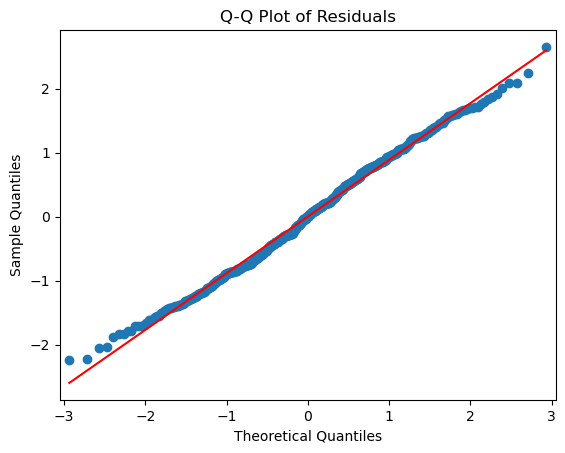

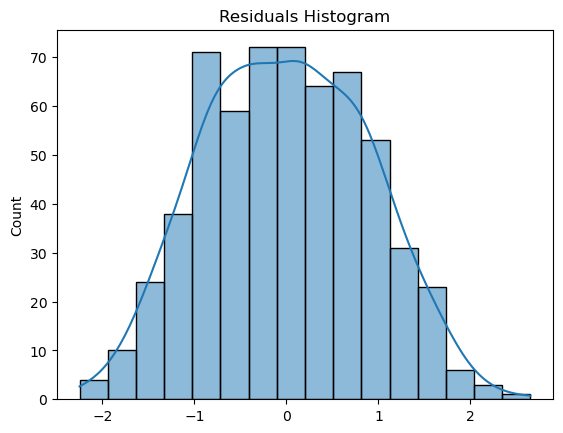

In [25]:
from scipy.stats import shapiro

# Extract residuals from the ANOVA model
residuals = model.resid

# Plot Q-Q plot for residuals
sm.qqplot(residuals, line='s')
plt.title("Q-Q Plot of Residuals")
plt.show()

# Plot a histogram of residuals
sns.histplot(residuals, kde=True)
plt.title('Residuals Histogram')
plt.show()


In [ ]:
# Perform Tukey's HSD test
tukey = pairwise_tukeyhsd(endog=df_combined_top_btm_100['log_price_sgd'], 
                          groups=df_combined_top_btm_100['amenity_group'], 
                          alpha=0.05)

# Display Tukey's HSD results
print(tukey.summary())

# Hypotheses and conclusion
print("\nTukey's HSD Hypotheses:")
print("H₀: There is no significant difference in mean prices between pairs of amenity groups.")
print("H₁: There is a significant difference in mean prices between at least one pair of amenity groups.")

# Interpretation of results
for result in tukey._results_table.data[1:]:
    group1, group2, meandiff, p_adj, lower, upper, reject = result
    print(f"\nComparing {group1} vs {group2}:")
    print(f"Mean Difference: {meandiff}, P-value: {p_adj}")
    if reject:
        print("Conclusion: Reject H₀. There is a significant difference in prices.")
    else:
        print("Conclusion: Fail to reject H₀. No significant difference in prices.")


           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
     group1           group2       meandiff p-adj   lower   upper  reject
-------------------------------------------------------------------------
Basic + Premium         Basic Only  -0.3471 0.0012 -0.5762 -0.1179   True
Basic + Premium No Basic Amenities  -0.7074    0.0 -0.9986 -0.4162   True
     Basic Only No Basic Amenities  -0.3604 0.0008 -0.5922 -0.1285   True
-------------------------------------------------------------------------

Tukey's HSD Hypotheses:
H₀: There is no significant difference in mean prices between pairs of amenity groups.
H₁: There is a significant difference in mean prices between at least one pair of amenity groups.

Comparing Basic + Premium vs Basic Only:
Mean Difference: -0.3471, P-value: 0.0012
Conclusion: Reject H₀. There is a significant difference in prices.

Comparing Basic + Premium vs No Basic Amenities:
Mean Difference: -0.7074, P-value: 0.0
Conclusion: Reject H₀. There is

### Two-Way ANOVA (Amenity Groups and Cities)

In [28]:
# Step 1: Ensure the 'amenity_group' and 'city' columns are categorized properly
df_combined_top_btm_100['amenity_group'] = df_combined_top_btm_100['amenity_group'].astype('category')
df_combined_top_btm_100['City'] = df_combined_top_btm_100['City'].astype('category')

# Step 2: Define the Two-Way ANOVA formula
# Replace 'price_sgd' with your price column, and 'amenity_group' and 'City' with the relevant columns
formula = 'log_price_sgd ~ C(amenity_group) * C(City)'

# Step 3: Fit the model
# Ensure city names are consistent and free of leading/trailing spaces
df_combined_top_btm_100['City'] = df_combined_top_btm_100['City'].str.strip().str.title()

# Fit the model and perform Two-Way ANOVA
model = ols(formula, data=df_combined_top_btm_100).fit()

# Step 4: Perform Two-Way ANOVA
anova_results = anova_lm(model)
print("Two-Way ANOVA Results:")
print(anova_results)



Two-Way ANOVA Results:
                             df      sum_sq    mean_sq           F  \
C(amenity_group)            2.0   14.855599   7.427800   15.143181   
C(City)                     2.0  179.124930  89.562465  182.592519   
C(amenity_group):C(City)    4.0    1.366891   0.341723    0.696676   
Residual                  589.0  288.907192   0.490505         NaN   

                                PR(>F)  
C(amenity_group)          3.862804e-07  
C(City)                   1.982225e-62  
C(amenity_group):C(City)  5.944513e-01  
Residual                           NaN  


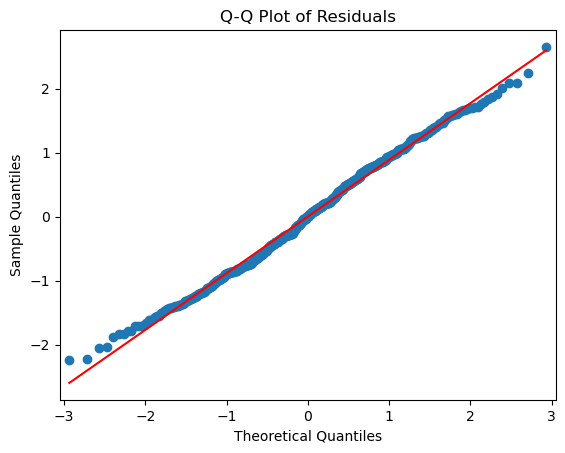

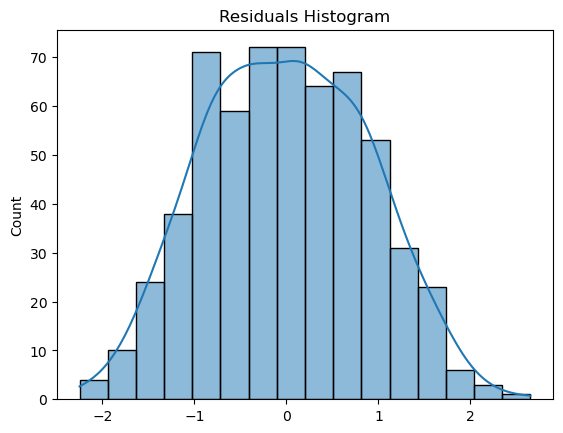

In [27]:
# Plot Q-Q plot for residuals
sm.qqplot(residuals, line='s')
plt.title("Q-Q Plot of Residuals")
plt.show()

# Plot a histogram of residuals
sns.histplot(residuals, kde=True)
plt.title('Residuals Histogram')
plt.show()

In [ ]:
# Shapiro-Wilk Test for Normality of Residuals
shapiro_test = shapiro(model.resid)
print("\nShapiro-Wilk Test for Normality of Residuals:")
print(f"Test Statistic: {shapiro_test.statistic}, P-value: {shapiro_test.pvalue}")

# Step 7: Optional - Tukey's HSD test for post-hoc analysis (if main effects are significant)
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Filter the dataframe to include only 'Basic Only' and 'Basic + Premium' categories
filtered_df_tukey = df_combined_top_btm_100[df_combined_top_btm_100['amenity_group'].isin(['Basic Only', 'Basic + Premium'])]

# Perform Tukey's HSD test
tukey = pairwise_tukeyhsd(endog=filtered_df_tukey['log_price_sgd'], groups=filtered_df_tukey['amenity_group'], alpha=0.05)
print(tukey.summary())

# Step 8: Add conclusion based on the ANOVA results
# Add the relevant H₀, H₁, and conclusions for main effects and interaction effects

print("\nHypotheses for Two-Way ANOVA:")
print("H₀: There is no effect of 'amenity_group' or 'city' on the listing prices.")
print("H₁: There is a significant effect of 'amenity_group' or 'city' on the listing prices, or there is an interaction effect between them.")

if anova_results['PR(>F)'][0] < 0.05:
    print("Conclusion: Reject H₀ for 'amenity_group'. There is a significant effect of 'amenity_group' on prices.")
else:
    print("Conclusion: Fail to reject H₀ for 'amenity_group'. No significant effect of 'amenity_group' on prices.")

if anova_results['PR(>F)'][1] < 0.05:
    print("Conclusion: Reject H₀ for 'City'. There is a significant effect of 'City' on prices.")
else:
    print("Conclusion: Fail to reject H₀ for 'City'. No significant effect of 'City' on prices.")

if anova_results['PR(>F)'][2] < 0.05:
    print("Conclusion: Reject H₀ for the interaction. There is a significant interaction between 'amenity_group' and 'City' affecting prices.")
else:
    print("Conclusion: Fail to reject H₀ for the interaction. No significant interaction between 'amenity_group' and 'City' affecting prices.")


Shapiro-Wilk Test for Normality of Residuals:
Test Statistic: 0.9966010383422542, P-value: 0.37534455767995656
      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
     group1       group2   meandiff p-adj   lower  upper  reject
----------------------------------------------------------------
Basic + Premium Basic Only  -0.3471 0.0005 -0.5421 -0.152   True
----------------------------------------------------------------

Hypotheses for Two-Way ANOVA:
H₀: There is no effect of 'amenity_group' or 'city' on the listing prices.
H₁: There is a significant effect of 'amenity_group' or 'city' on the listing prices, or there is an interaction effect between them.
Conclusion: Reject H₀ for 'amenity_group'. There is a significant effect of 'amenity_group' on prices.
Conclusion: Reject H₀ for 'City'. There is a significant effect of 'City' on prices.
Conclusion: Fail to reject H₀ for the interaction. No significant interaction between 'amenity_group' and 'City' affecting prices.


C:\Users\leeze\AppData\Local\Temp\ipykernel_19776\2313198186.py:23: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\leeze\AppData\Local\Temp\ipykernel_19776\2313198186.py:28: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\leeze\AppData\Local\Temp\ipykernel_19776\2313198186.py:33: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



### Two-Way ANOVA (Amenity Groups and Review Groups)

Two-Way ANOVA Results:
                                     df      sum_sq    mean_sq          F  \
C(amenity_group)                    2.0   14.855599   7.427800  10.355184   
C(review_group)                     1.0   32.804444  32.804444  45.733067   
C(amenity_group):C(review_group)    2.0   11.951484   5.975742   8.330853   
Residual                          592.0  424.643086   0.717303        NaN   

                                        PR(>F)  
C(amenity_group)                  3.799069e-05  
C(review_group)                   3.257630e-11  
C(amenity_group):C(review_group)  2.703556e-04  
Residual                                   NaN  


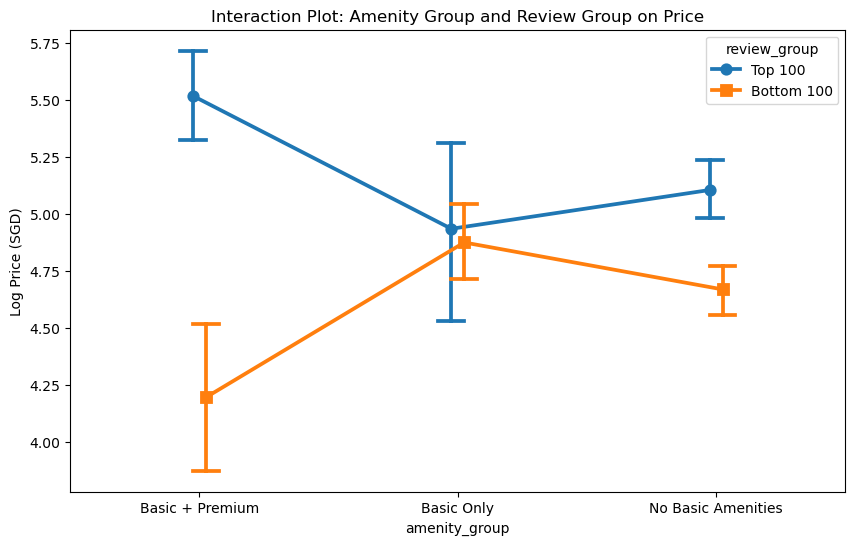

In [29]:
# Step 1: Ensure the 'amenity_group' and 'city' columns are categorized properly
df_combined_top_btm_100['amenity_group'] = df_combined_top_btm_100['amenity_group'].astype('category')
df_combined_top_btm_100['review_group'] = df_combined_top_btm_100['review_group'].astype('category')

# Step 2: Define the Two-Way ANOVA formula
# Replace 'price_sgd' with your price column, and 'amenity_group' and 'City' with the relevant columns
formula = 'log_price_sgd ~ C(amenity_group) * C(review_group)'

# Step 3: Fit the model
# Ensure city names are consistent and free of leading/trailing spaces
df_combined_top_btm_100['review_group'] = df_combined_top_btm_100['review_group'].str.strip()

# Fit the model and perform Two-Way ANOVA
model = ols(formula, data=df_combined_top_btm_100).fit()

# Step 4: Perform Two-Way ANOVA
anova_results = anova_lm(model)
print("Two-Way ANOVA Results:")
print(anova_results)

# Plot interaction effects
plt.figure(figsize=(10, 6))
sns.pointplot(x='amenity_group', y='log_price_sgd', hue='review_group', data=df_combined_top_btm_100, dodge=True, markers=['o', 's'], capsize=.1)
plt.title('Interaction Plot: Amenity Group and Review Group on Price')
plt.ylabel('Log Price (SGD)')
plt.show()




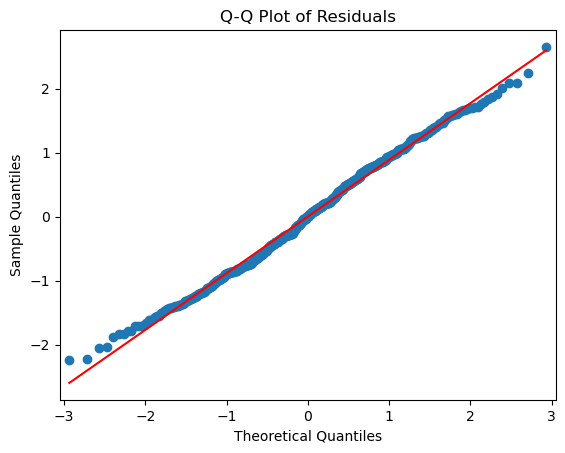

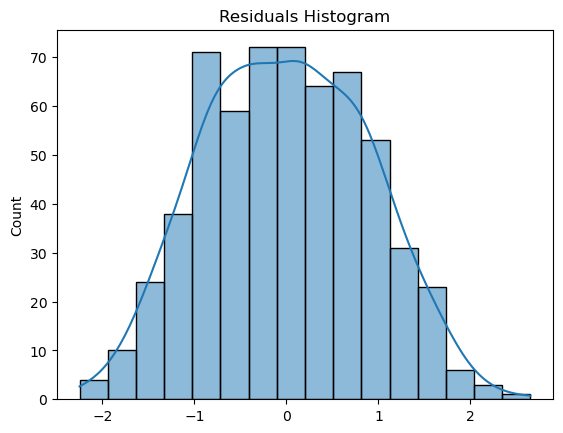

In [30]:
# Plot Q-Q plot for residuals
sm.qqplot(residuals, line='s')
plt.title("Q-Q Plot of Residuals")
plt.show()

# Plot a histogram of residuals
sns.histplot(residuals, kde=True)
plt.title('Residuals Histogram')
plt.show()

                       Multiple Comparison of Means - Tukey HSD, FWER=0.05                        
            group1                        group2            meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------------------------------------
   Basic + Premium_Bottom 100       Basic + Premium_Top 100   1.3219    0.0  0.6786  1.9653   True
   Basic + Premium_Bottom 100         Basic Only_Bottom 100   0.6793 0.0404  0.0175  1.3411   True
   Basic + Premium_Bottom 100            Basic Only_Top 100   0.7393 0.1896 -0.1737  1.6522  False
   Basic + Premium_Bottom 100 No Basic Amenities_Bottom 100   0.4734 0.2299 -0.1362  1.0829  False
   Basic + Premium_Bottom 100    No Basic Amenities_Top 100   0.9093 0.0004  0.2977   1.521   True
      Basic + Premium_Top 100         Basic Only_Bottom 100  -0.6427 0.0001 -1.0452 -0.2401   True
      Basic + Premium_Top 100            Basic Only_Top 100  -0.5827 0.2251 -1.3294   0.164  False
      Basi

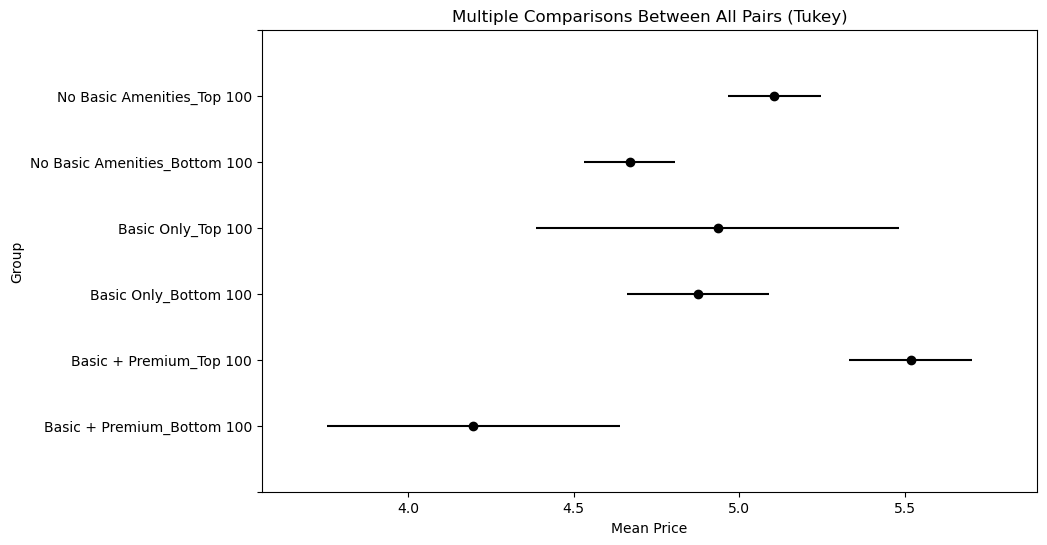

In [31]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Step 1: Create a combined column for both 'amenity_group' and 'review_group'
df_combined_top_btm_100['amenity_review_group'] = df_combined_top_btm_100['amenity_group'].astype(str) + "_" + df_combined_top_btm_100['review_group'].astype(str)

# Step 2: Run the Tukey HSD test on the combined 'amenity_review_group'
tukey = pairwise_tukeyhsd(endog=df_combined_top_btm_100['log_price_sgd'], groups=df_combined_top_btm_100['amenity_review_group'], alpha=0.05)

# Step 3: Print Tukey's HSD Summary
print(tukey.summary())

# Step 4: Plot the results (optional)
tukey.plot_simultaneous(ylabel='Group', xlabel='Mean Price')  # This shows confidence intervals for the comparisons
plt.show()
